##### 2.2.1.1 K均值算法
##### 利用k-means对完整的手写体数字图像数据集进行聚类

In [4]:
# 导入数学运算、作图以及数据分析的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 训练集3823条，测试集1797条
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

X_train = digits_train[np.arange(64)]
X_test = digits_test[np.arange(64)]

y_train = digits_train[64]
y_test = digits_test[64]

In [5]:
# 导入K-means模型
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

ARI指标： 0.6712670909071894


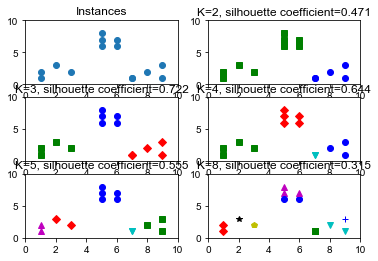

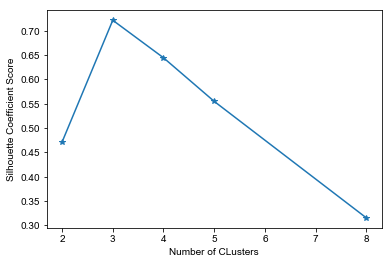

In [23]:
# 性能评测
# Method 1：有正确的类别信息，用ARI指标
from sklearn import metrics
print('ARI指标：', metrics.adjusted_rand_score(y_test, y_pred))
# Method 2：数据无所属类别，用轮廓系数:系数越大，聚类效果越好
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.subplot(3, 2, 1)
# 初始化原始数据点
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s, silhouette coefficient=%0.03f' % (t, sc_score))

plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

In [24]:
# "肘部"观察法示例
from scipy.spatial.distance import cdist
